In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

routes_df = pd.DataFrame({
    "route_code": [
        "VJRQ+2M|RMJJ+F4",
        "WH5F+26|WJ8X+F5W",
        "XJPW+92|WJP4+FF",
        "2HVW+G8|XJXR+WG",
        "XHFC+WMF|WGGC+MG",
        "XPC7+72|XM33+J3",
        "WHCJ+26|XGCP+FV",
        "XMW9+G8|WMJR+V4",
        "XHJ7+MG|WJM6+VC",
        "WHR9+R6|XJGF+6J",
    ]
})
# routes_df = pd.DataFrame({"route_code": ["XJG4+7J|5PX4+HQ"]})

locations = pd.read_csv("csv-locations_12.9514242_77.6590212.csv").to_dict(orient='list')
locate = lambda plus_code: locations['location'][locations['plus_code'].index(plus_code)]

df = pd.read_csv("csv-bangalore_traffic.csv")
# Keep only those rows of df that correspond to routes in routes_df
df = df[df['route_code'].isin(routes_df['route_code'])]
display(df)

,date,time,route_code,duration,distance
2,2025-09-25,14:25,VJRQ+2M|RMJJ+F4,23,10.3
3,2025-09-25,14:25,WH5F+26|WJ8X+F5W,25,10.2
4,2025-09-25,14:25,XJPW+92|WJP4+FF,38,10.4
5,2025-09-25,14:25,2HVW+G8|XJXR+WG,31,9.9
6,2025-09-25,14:25,XHFC+WMF|WGGC+MG,36,11.0
...,...,...,...,...,...
1210,2025-09-29,23:20,XPC7+72|XM33+J3,18,9.4
1211,2025-09-29,23:20,WHCJ+26|XGCP+FV,23,10.7
1212,2025-09-29,23:20,XMW9+G8|WMJR+V4,16,10.1
1213,2025-09-29,23:20,XHJ7+MG|WJM6+VC,20,10.6


![routes.png](routes.png)

In [18]:
display(df.describe())
display(df.describe(exclude='number'))
display(df['route_code'].value_counts())

,duration,distance
count,1020.000000,1020.000000
mean,27.623529,10.282745
std,8.740026,0.564953
min,13.000000,9.400000
25%,20.000000,9.900000
50%,27.000000,10.200000
75%,35.000000,10.600000
max,58.000000,13.700000


,date,time,route_code
count,1020,1020,1020
unique,5,50,10
top,2025-09-26,16:20,VJRQ+2M|RMJJ+F4
freq,230,50,102


route_code
VJRQ+2M|RMJJ+F4     102
WH5F+26|WJ8X+F5W    102
XJPW+92|WJP4+FF     102
2HVW+G8|XJXR+WG     102
XHFC+WMF|WGGC+MG    102
XPC7+72|XM33+J3     102
WHCJ+26|XGCP+FV     102
XMW9+G8|WMJR+V4     102
XHJ7+MG|WJM6+VC     102
WHR9+R6|XJGF+6J     102
Name: count, dtype: int64

In [19]:
# Process traffic data
df_traffic = df.copy()
df_traffic['year'] = pd.to_datetime(df_traffic['date']).dt.year
df_traffic['month'] = pd.to_datetime(df_traffic['date']).dt.month
df_traffic['date'] = pd.to_datetime(df_traffic['date']).dt.day
df_traffic['hour'] = pd.to_datetime(df_traffic['time'], format='%H:%M', errors='coerce').dt.hour
df_traffic['avg_speed'] = round(df_traffic['distance'] / (df_traffic['duration'] / 60), 2)
df_traffic['origin'] = df_traffic['route_code'].str.split('|').str[0].apply(locate)
df_traffic['destination'] = df_traffic['route_code'].str.split('|').str[1].apply(locate)
df_traffic = df_traffic[['year', 'month', 'date', 'hour', 'origin', 'destination', 'duration', 'distance', 'avg_speed']]
df_traffic = df_traffic.sort_values(['year', 'month', 'date', 'hour', 'duration'], ascending=[True, True, True, True, True]).reset_index(drop=True)
display(df_traffic.tail(15))

,year,month,date,hour,origin,destination,duration,distance,avg_speed
1005,2025,9,29,22,Swami Vivekananda Road Metro Station,"Christ University, Hosur Main Road",27,10.4,23.11
1006,2025,9,29,22,"Big Bull Temple, Basavanagudi","Shri Someshwara Swamy Temple, Halasuru",27,10.1,22.44
1007,2025,9,29,22,"Bethel AG Church, Hebbal",SMVT Railway Station,29,9.9,20.48
1008,2025,9,29,22,"RV Road Metro Station, Jayanagar 5th Block","Vijayanagar Metro Station, Chord Road",30,10.6,21.20
1009,2025,9,29,22,"Kempegowda Bus Station, Majestic","Sparsh Hospital, RR Nagar",31,12.8,24.77
1010,2025,9,29,23,Benniganahalli Metro Station,"Embassy TechVillage, Devarabisanahalli",16,10.1,37.88
1011,2025,9,29,23,Jaya Prakash Nagar Metro Station,"Hemavathi Park, HSR Layout",17,10.2,36.00
1012,2025,9,29,23,The Rameshwaram Cafe @ Brookfield,"Gawky Goose, Wind Tunnel Rd",18,9.4,31.33
1013,2025,9,29,23,Kudlu Gate Metro Station,Biocon Campus,19,12.6,39.79
1014,2025,9,29,23,Lulu Mall Bengaluru,Nexus Mall Koramangala,20,10.6,31.80


In [20]:
df_minmax = df_traffic[(df_traffic['hour'] >= 0) & (df_traffic['hour'] <= 23)].copy()

df_minmax['route'] = df_minmax.apply(lambda r: f"{r['origin']} \u2192 {r['destination']}", axis=1)
df_minmax = df_minmax.groupby(['route', 'hour'])['avg_speed'].mean().unstack().reset_index()
df_minmax['variance'] = df_minmax.iloc[:, 1:].apply(lambda row: row.max() - row.min(), axis=1)
df_minmax['max_hour'] = df_minmax.iloc[:, 1:-1].apply(lambda row: row.idxmax(), axis=1)
df_minmax['min_hour'] = df_minmax.iloc[:, 1:-2].apply(lambda row: row.idxmin(), axis=1)

df_minmax[['route', 'max_hour', 'min_hour', 'variance']].\
    sort_values(by='variance', ascending=False).reset_index(drop=True)

hour,route,max_hour,min_hour,variance
0,Lulu Mall Bengaluru → Nexus Mall Koramangala,4,18,23.1780
1,The Rameshwaram Cafe @ Brookfield → Gawky Goos...,4,16,22.8580
2,Kudlu Gate Metro Station → Biocon Campus,4,18,21.7860
3,Swami Vivekananda Road Metro Station → Christ ...,3,18,21.6710
4,"RV Road Metro Station, Jayanagar 5th Block → V...",3,18,20.5630
5,Jaya Prakash Nagar Metro Station → Hemavathi P...,2,18,18.0825
6,"Big Bull Temple, Basavanagudi → Shri Someshwar...",4,17,16.2240
7,"Bethel AG Church, Hebbal → SMVT Railway Station",3,18,15.9430
8,"Kempegowda Bus Station, Majestic → Sparsh Hosp...",2,18,15.5780
9,Benniganahalli Metro Station → Embassy TechVil...,5,17,14.9090


In [26]:
# Boxplots for duration, distance, and average speed per route
df_box = df_filled.copy()
df_box['ts'] = pd.to_datetime(df_box['ts'], errors='coerce')
df_box = df_box.dropna(subset=['ts'])

# Use 'route' column directly (already human-readable)
df_box['label'] = df_box['route']

# Average speed already computed in df_filled as 'speed_smooth' or recalculate if needed
# If duration/distance exist in df_filled, use them; otherwise use speed_smooth directly
if 'duration' in df_box.columns and 'distance' in df_box.columns:
    df_box['avg_speed'] = 60.0 * df_box['distance'] / df_box['duration'].replace(0, pd.NA)
else:
    # Use the smoothed speed if duration/distance not available
    df_box['avg_speed'] = df_box.get('speed_smooth', df_box.get('avg_speed', pd.NA))

metrics = [
    ('avg_speed', 'Average speed (km/h)'),
    ('duration', 'Duration (minutes)')
]

# Sort routes by median avg_speed (descending)
route_order = (
    df_box.groupby('label')['avg_speed']
          .median()
          .sort_values(ascending=False)
          .index.tolist()
)

fig, axes = plt.subplots(1, len(metrics), figsize=(18, 15), sharex=False, dpi=300)

for ax, (metric, ylabel) in zip(axes, metrics):
    sns.boxplot(
        data=df_box,
        x='label',
        y=metric,
        hue='label',
        order=route_order,
        hue_order=route_order,
        palette=color_map,
        dodge=False, 
        legend=False,
        ax=ax
    )
    # Make box faces semi-transparent
    for patch in ax.artists:
        fc = patch.get_facecolor()
        patch.set_facecolor((*fc[:3], 0.4))

    for line in ax.lines:
        line.set_alpha(0.4)

    ax.set_xlabel('')
    ax.set_ylabel(ylabel)
    ax.set_title(f'{ylabel} by Route')
    ax.tick_params(axis='x', rotation=90, labelbottom=True, bottom=True)

plt.subplots_adjust(bottom=0.35)
plt.show()

NameError: name 'df_filled' is not defined

In [27]:
def plot_traffic_square(df_incoming, height='square'):
    """
    Plot average speed over time for all routes in the raw DataFrame.
    
    Parameters
    ----------
    df_incoming : pd.DataFrame
        Must contain columns: 
        - 'date' (str, YYYY-MM-DD)
        - 'time' (str, HH:MM)
        - 'route' (str, human-readable route name)
        - 'duration' (numeric, minutes)
        - 'distance' (numeric, km)
    height : str, default='square'
        Figure aspect ratio: 'square' (1:1), 'tall' (1:1.5), or 'wide' (1.5:1).
        Minimum dimension is 12 units.
    """
    # 1) Build timestamps and compute average speed
    if df_incoming.empty:
        print("No data available in the dataset.")
        return

    df = df_incoming.copy()
    df['ts'] = pd.to_datetime(df_incoming['date'] + ' ' + df_incoming['time'], errors='coerce')
    df = df[['ts', 'route', 'duration', 'distance']]

    # Average speed (km/h) = 60 * distance / duration
    df['avg_speed'] = 60.0 * df['distance'] / df['duration'].replace(0, pd.NA)
        
    # 2) Build a common timeline (all observed timestamps)
    timeline = pd.Index(sorted(df['ts'].unique()))
    
    # 3) Fill missing data and smooth per route
    def fill_and_smooth_route(df):
        """Reindex to timeline, fill missing speeds, and smooth."""
        g = df.set_index('ts').reindex(timeline)
        
        # Fill average speed with neighbor mean
        speeds = pd.to_numeric(g['avg_speed'], errors='coerce')
        prev_vals = speeds.ffill()
        next_vals = speeds.bfill()
        filled = speeds.copy()
        
        mask_missing = speeds.isna()
        mask_both = mask_missing & prev_vals.notna() & next_vals.notna()
        filled.loc[mask_both] = (prev_vals.loc[mask_both] + next_vals.loc[mask_both]) / 2.0
        
        mask_prev_only = mask_missing & prev_vals.notna() & next_vals.isna()
        mask_next_only = mask_missing & next_vals.notna() & prev_vals.isna()
        filled.loc[mask_prev_only] = prev_vals.loc[mask_prev_only]
        filled.loc[mask_next_only] = next_vals.loc[mask_next_only]
        
        g['speed_filled'] = filled
        
        # Smooth the filled speeds (ts is already in the index before reset)
        ts_series = g.index.to_series()
        speed_series = g['speed_filled']
        
        mask_valid = speed_series.notna()
        ts_valid = ts_series[mask_valid]
        speed_valid = speed_series[mask_valid]
        
        if len(speed_valid) < 3:
            g['speed_smooth'] = speed_series
        else:
            try:
                from scipy.interpolate import PchipInterpolator
                x = ts_valid.map(pd.Timestamp.toordinal).to_numpy(dtype=float)
                y = speed_valid.to_numpy(dtype=float)
                x_all = ts_series.map(pd.Timestamp.toordinal).to_numpy(dtype=float)
                interp = PchipInterpolator(x, y)
                g['speed_smooth'] = pd.Series(interp(x_all), index=g.index)
            except Exception:
                # Fallback: centered rolling mean
                win = 3 if len(speed_valid) < 10 else 5
                g['speed_smooth'] = speed_series.rolling(window=win, center=True, min_periods=1).mean()
        
        return g.reset_index(names='ts')

    # Process each route
    frames = []
    for route in sorted(df['route'].unique()):
        route_data = df.loc[df['route'] == route, ['ts', 'route', 'avg_speed']]
        frames.append(fill_and_smooth_route(route_data))
    
    df_filled = pd.concat(frames, ignore_index=True).sort_values(['ts', 'route'])
    
    # 4) Determine figure size based on height parameter
    min_size = 12
    if height == 'square':
        figsize = (min_size, min_size)
    elif height == 'tall':
        figsize = (min_size, min_size * 1.5)
    elif height == 'wide':
        figsize = (min_size * 1.5, min_size)
    else:
        raise ValueError(f"height must be 'square', 'tall', or 'wide', got: {height}")
    
    # 5) Plot: average speed, legend outside, HH-only x-axis
    hue_order = sorted(df_filled['route'].unique())
    palette = sns.color_palette("tab20", n_colors=len(hue_order))
    
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    sns.lineplot(
        data=df_filled,
        x='ts', y='speed_smooth',
        hue='route',
        hue_order=hue_order,
        palette=palette,
        ax=ax,
        linewidth=8, alpha=0.4
    )
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.margins(x=0)
    ax.set_xlim(df_filled['ts'].min(), df_filled['ts'].max())
    
    # X-axis as hours only (HH)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.set_xlabel('Time (Hour)'.upper(), fontsize=14)
    ax.set_ylabel('Average Speed (km/h)'.upper(), fontsize=14)
    
    # Dynamic title based on time range
    start = df_filled['ts'].min()
    end = df_filled['ts'].max()
    time_range_hours = (end - start).total_seconds() / 3600
    ax.set_title(f'Route Average Speed Over {time_range_hours:.0f} Hours')
    
    # Legend outside on the bottom
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(
        handles, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.08),
        ncol=2,
        frameon=True,
        borderaxespad=0.0,
        fontsize=11,
        borderpad=1.0,
        labelspacing=0.8
    )
    leg.get_frame().set_linewidth(0.8)
    leg.get_frame().set_edgecolor('#000000')
    plt.subplots_adjust(bottom=0.24)
    plt.tight_layout()
    plt.show()
    return df_filled

In [28]:
filter_string = "date >= '2025-09-1'"

df_incoming = df.query(filter_string).copy()
df_incoming['route'] = df_incoming['route_code'].\
    apply(lambda r: f"{locate(r.split('|')[0])} \u2192 {locate(r.split('|')[1])}")
df_incoming = df_incoming[['date', 'time', 'route', 'duration', 'distance']].\
    reset_index(drop=True)

display(df_incoming)

,date,time,route,duration,distance
0,2025-09-25,14:25,Kudlu Gate Metro Station → Biocon Campus,23,10.3
1,2025-09-25,14:25,Jaya Prakash Nagar Metro Station → Hemavathi P...,25,10.2
2,2025-09-25,14:25,Swami Vivekananda Road Metro Station → Christ ...,38,10.4
3,2025-09-25,14:25,"Bethel AG Church, Hebbal → SMVT Railway Station",31,9.9
4,2025-09-25,14:25,"Kempegowda Bus Station, Majestic → Sparsh Hosp...",36,11.0
...,...,...,...,...,...
1015,2025-09-29,23:20,The Rameshwaram Cafe @ Brookfield → Gawky Goos...,18,9.4
1016,2025-09-29,23:20,"RV Road Metro Station, Jayanagar 5th Block → V...",23,10.7
1017,2025-09-29,23:20,Benniganahalli Metro Station → Embassy TechVil...,16,10.1
1018,2025-09-29,23:20,Lulu Mall Bengaluru → Nexus Mall Koramangala,20,10.6


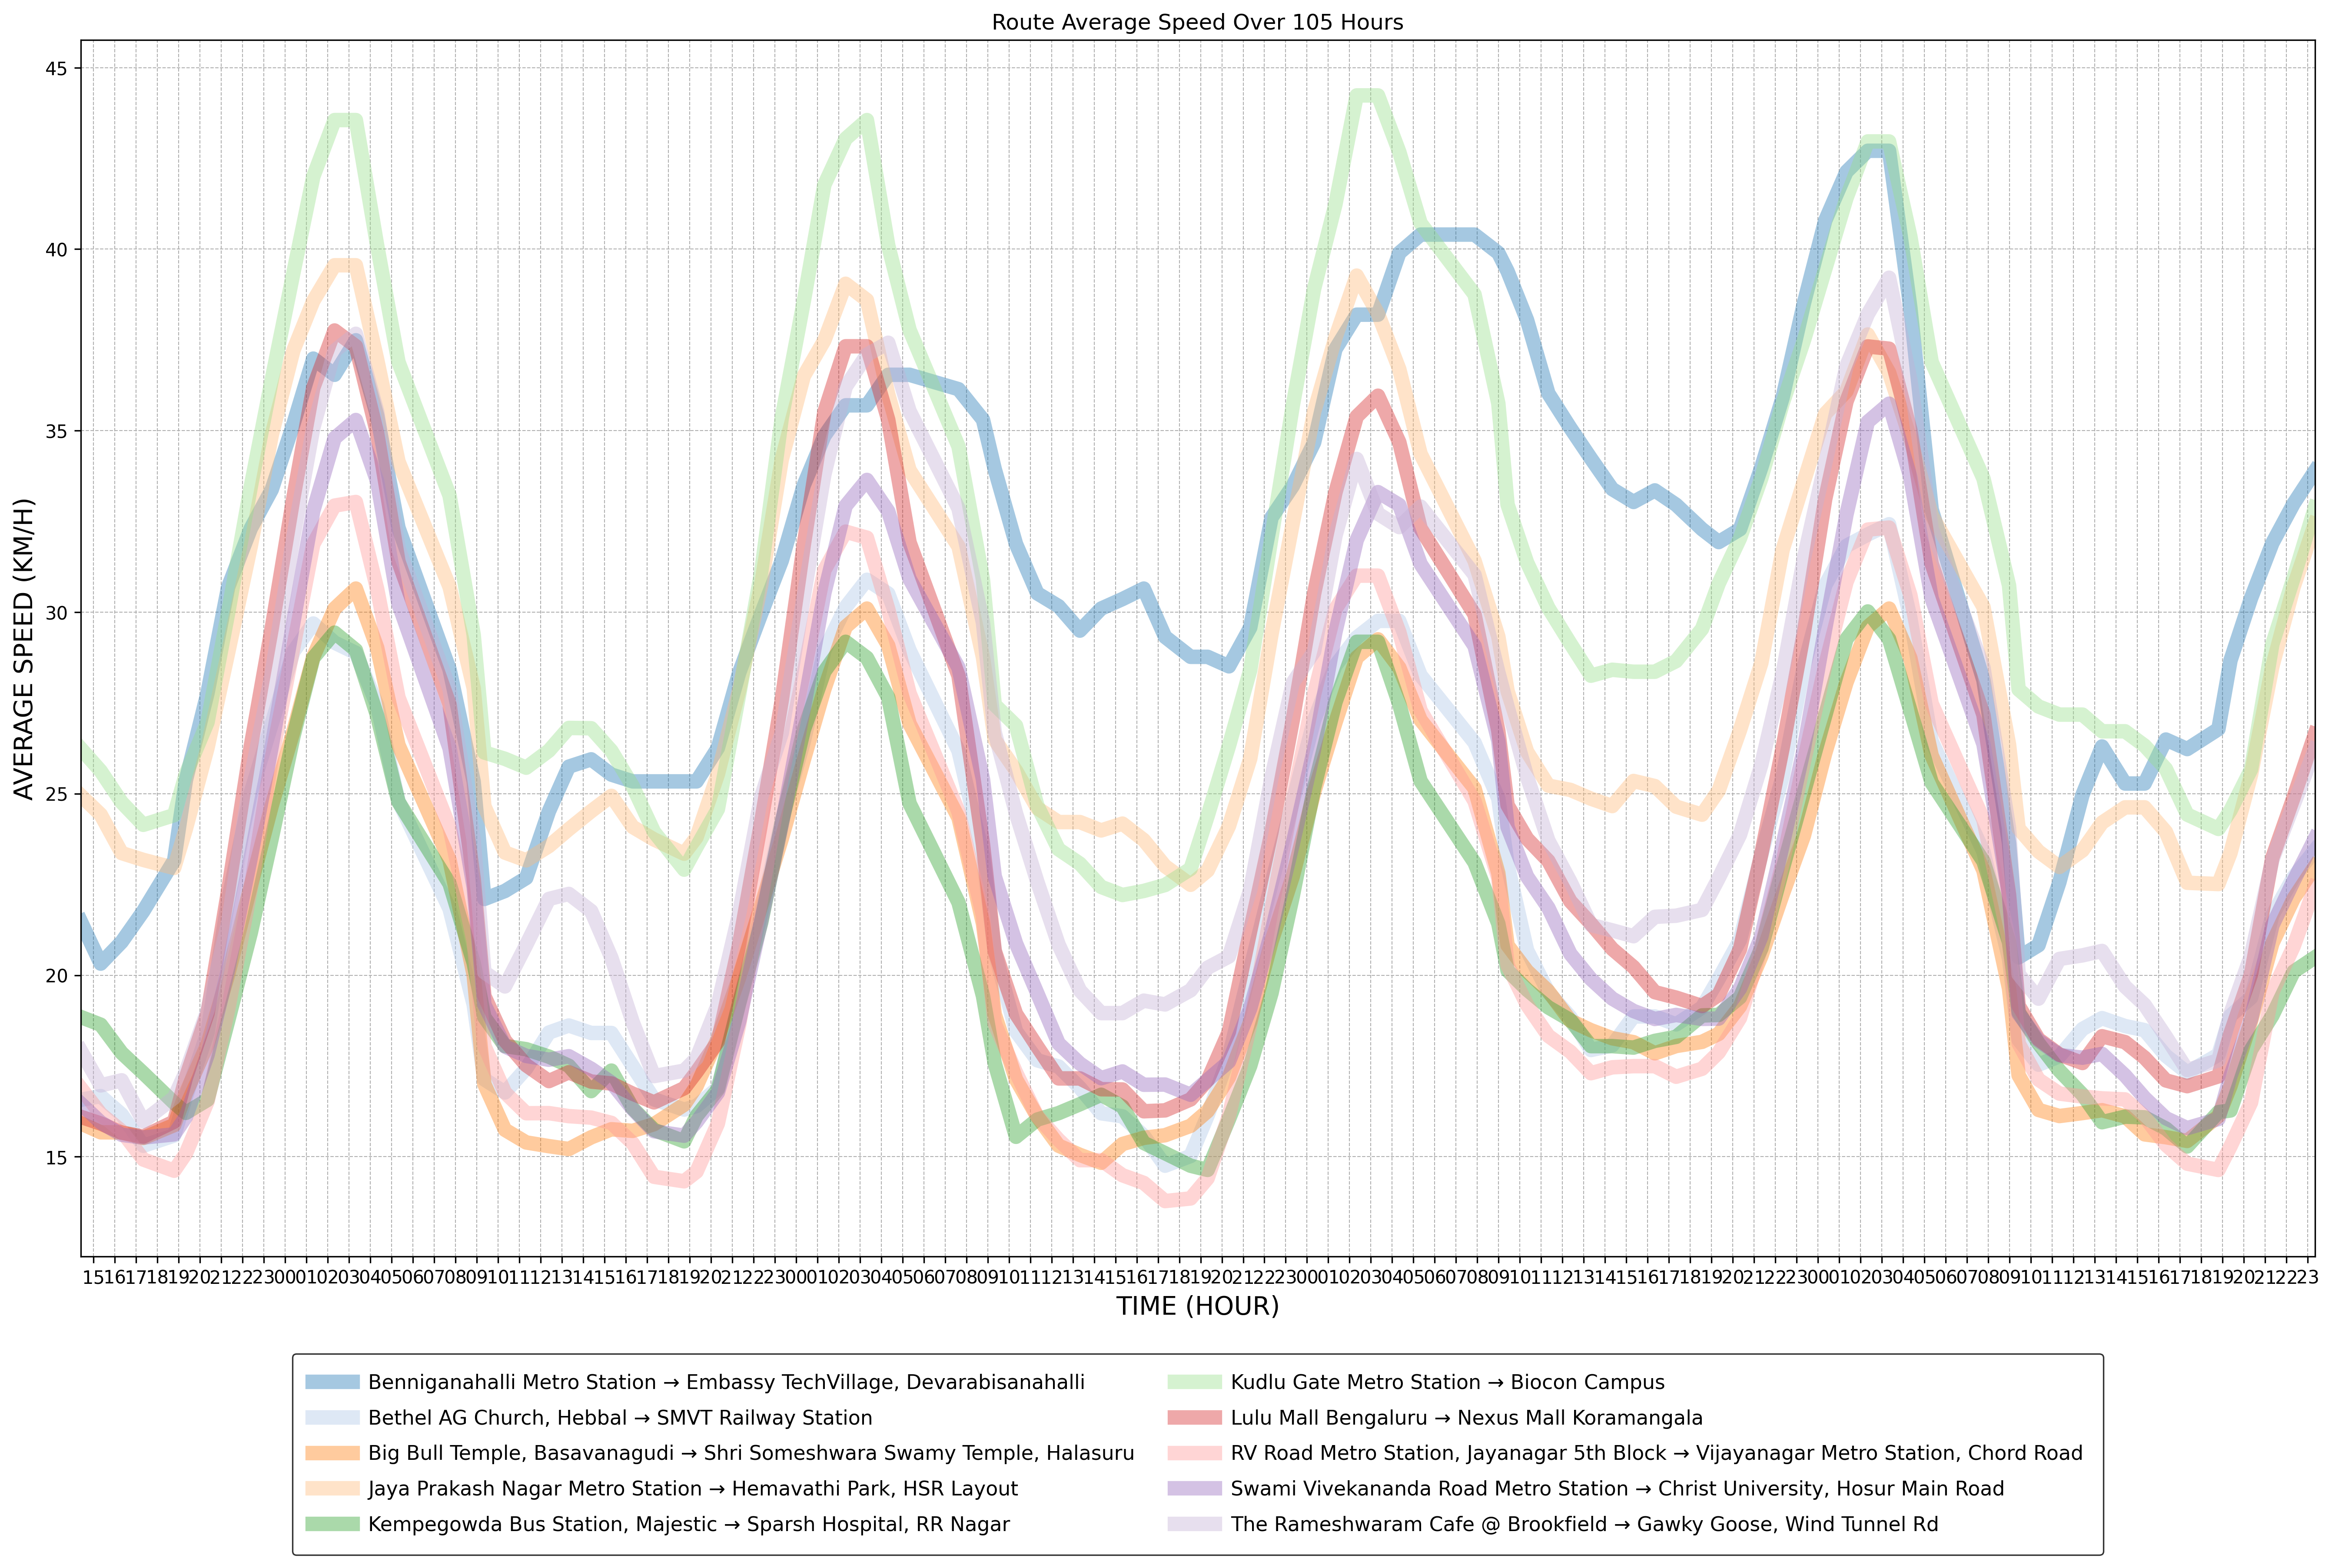

,ts,route,avg_speed,speed_filled,speed_smooth
0,2025-09-25 14:25:00,Benniganahalli Metro Station → Embassy TechVil...,23.307692,23.307692,21.479638
102,2025-09-25 14:25:00,"Bethel AG Church, Hebbal → SMVT Railway Station",19.161290,19.161290,16.567716
204,2025-09-25 14:25:00,"Big Bull Temple, Basavanagudi → Shri Someshwar...",16.050000,16.050000,15.919512
306,2025-09-25 14:25:00,Jaya Prakash Nagar Metro Station → Hemavathi P...,24.480000,24.480000,24.949565
408,2025-09-25 14:25:00,"Kempegowda Bus Station, Majestic → Sparsh Hosp...",18.333333,18.333333,18.847953
...,...,...,...,...,...
611,2025-09-29 23:20:00,Kudlu Gate Metro Station → Biocon Campus,39.789474,39.789474,32.882206
713,2025-09-29 23:20:00,Lulu Mall Bengaluru → Nexus Mall Koramangala,31.800000,31.800000,26.642857
815,2025-09-29 23:20:00,"RV Road Metro Station, Jayanagar 5th Block → V...",27.913043,27.913043,22.428157
917,2025-09-29 23:20:00,Swami Vivekananda Road Metro Station → Christ ...,27.391304,27.391304,23.767472


In [29]:
plot_traffic_square(df_incoming, height='wide')